In [1]:
# 1. Import the datasets and libraries, check datatype, statistical summary,shape,null values or incorrect imputation (5 Marks)

In [2]:
# 1.1 Loading Libraries
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import os,sys
from scipy import stats
from sklearn import metrics

In [3]:
# 1.2 Load dataset
df = pd.read_csv('Bank_Personal_Loan_Modelling.csv')
df.head()
df.tail()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0
4999,5000,28,4,83,92612,3,0.8,1,0,0,0,0,1,1


In [4]:
# 1.3 Check datatype
df.dtypes

ID                      int64
Age                     int64
Experience              int64
Income                  int64
ZIP Code                int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal Loan           int64
Securities Account      int64
CD Account              int64
Online                  int64
CreditCard              int64
dtype: object

In [5]:
# 1.4 statistical summary-the distribution of the various attribute
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


In [6]:
df.loc[df['Personal Loan'] ==1].describe().T

,count,mean,std,min,25%,50%,75%,max
ID,480.0,2390.650000,1394.393674,10.0,1166.50,2342.0,3566.0000,4981.0
Age,480.0,45.066667,11.590964,26.0,35.00,45.0,55.0000,65.0
Experience,480.0,19.843750,11.582443,0.0,9.00,20.0,30.0000,41.0
Income,480.0,144.745833,31.584429,60.0,122.00,142.5,172.0000,203.0
ZIP Code,480.0,93153.202083,1759.223753,90016.0,91908.75,93407.0,94705.5000,96008.0
Family,480.0,2.612500,1.115393,1.0,2.00,3.0,4.0000,4.0
CCAvg,480.0,3.905354,2.097681,0.0,2.60,3.8,5.3475,10.0
Education,480.0,2.233333,0.753373,1.0,2.00,2.0,3.0000,3.0
Mortgage,480.0,100.845833,160.847862,0.0,0.00,0.0,192.5000,617.0
Personal Loan,480.0,1.000000,0.000000,1.0,1.00,1.0,1.0000,1.0


In [7]:
df.loc[df['Personal Loan'] ==0].describe().T

,count,mean,std,min,25%,50%,75%,max
ID,4520.0,2512.165487,1448.299331,1.0,1259.75,2518.5,3768.25,5000.0
Age,4520.0,45.367257,11.450427,23.0,35.00,45.0,55.00,67.0
Experience,4520.0,20.132301,11.456672,-3.0,10.00,20.0,30.00,43.0
Income,4520.0,66.237389,40.578534,8.0,35.00,59.0,84.00,224.0
ZIP Code,4520.0,93152.428761,2156.949654,9307.0,91911.00,93437.0,94608.00,96651.0
Family,4520.0,2.373451,1.148771,1.0,1.00,2.0,3.00,4.0
CCAvg,4520.0,1.729009,1.567647,0.0,0.60,1.4,2.30,8.8
Education,4520.0,1.843584,0.839975,1.0,1.00,2.0,3.00,3.0
Mortgage,4520.0,51.789381,92.038931,0.0,0.00,0.0,98.00,635.0
Personal Loan,4520.0,0.000000,0.000000,0.0,0.00,0.0,0.00,0.0


In [8]:
# 1.6 Shape
df.shape

(5000, 14)

In [9]:
# 1.7 Null Values - No Null values identified
df.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [10]:
# 1.8 Incorrect imputations
# Min of exp is negative 
# Rational of changing the negative values is that there is typo of - against the exp value
df['Experience'] = df['Experience'].abs()

In [11]:
# 2. EDA: Study the data distribution in each attribute and target variable, share your findings (20 Marks)
  # 2.1. Number of unique in each column?
  # 2.2. Number of people with zero mortgage?
  # 2.3. Number of people with zero credit card spending per month?
  # 2.4. Value counts of all categorical columns
  # 2.5. Univariate and Bivariate
  # 2.6. Get data model ready

In [12]:
# 2.1. Number of unique in each column?

# Selecting the columns - Experience, Family, Education as unique values makes sense for these columns only
for column in df:
    print("Unique Values for column " ,column,":",df[column].nunique())

Unique Values for column  ID : 5000
Unique Values for column  Age : 45
Unique Values for column  Experience : 44
Unique Values for column  Income : 162
Unique Values for column  ZIP Code : 467
Unique Values for column  Family : 4
Unique Values for column  CCAvg : 108
Unique Values for column  Education : 3
Unique Values for column  Mortgage : 347
Unique Values for column  Personal Loan : 2
Unique Values for column  Securities Account : 2
Unique Values for column  CD Account : 2
Unique Values for column  Online : 2
Unique Values for column  CreditCard : 2


In [13]:
# 2.2. Number of people with zero mortgage?
Count_People_Zero_Mortgage=len(df.loc[df['Mortgage']==0])
Count_People_Zero_Mortgage

3462

In [14]:
 # 2.3. Number of people with zero credit card spending per month?
Count_People_Zero_CCSpend=len(df.loc[df['CCAvg']==0])
Count_People_Zero_CCSpend

106

In [15]:
# 2.4. Value counts of all categorical columns 
   # Personal Loan, Securities Account, CD Account, Online, CreditCard, Family, Experience
df['Personal Loan'].value_counts()
df['Securities Account'].value_counts()
df['CD Account'].value_counts()
df['Online'].value_counts()
df['CreditCard'].value_counts()
df['Family'].value_counts()
df['Education'].value_counts()
df['Personal Loan'].value_counts()

0    4520
1     480
Name: Personal Loan, dtype: int64

0    4478
1     522
Name: Securities Account, dtype: int64

0    4698
1     302
Name: CD Account, dtype: int64

1    2984
0    2016
Name: Online, dtype: int64

0    3530
1    1470
Name: CreditCard, dtype: int64

1    1472
2    1296
4    1222
3    1010
Name: Family, dtype: int64

1    2096
3    1501
2    1403
Name: Education, dtype: int64

0    4520
1     480
Name: Personal Loan, dtype: int64

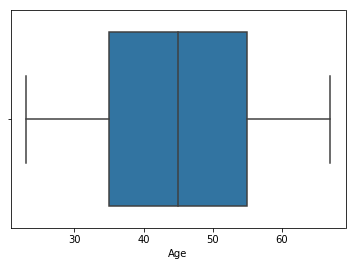

In [16]:
# 2.5. Univariate and Bivariate
# Univariate Analysis for Columns - Age, Experience, Income, Family, CCAvg, Education
sns.boxplot(df['Age'])

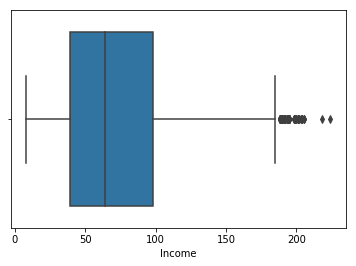

In [17]:
sns.boxplot(df['Income'])

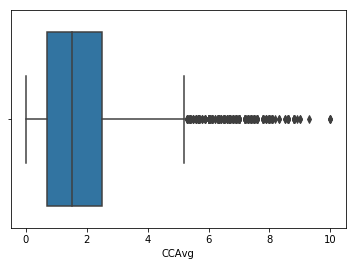

In [18]:
sns.boxplot(df['CCAvg'])

In [19]:
pd.crosstab(df['Education'],df['Personal Loan'])

Personal Loan,0,1
Education,,
1,2003,93
2,1221,182
3,1296,205


In [20]:
pd.crosstab(df['Family'],df['Personal Loan'])

Personal Loan,0,1
Family,,
1,1365,107
2,1190,106
3,877,133
4,1088,134


In [21]:
df.corr()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
ID,1.000000,-0.008473,-0.008202,-0.017695,0.013432,-0.016797,-0.024675,0.021463,-0.013920,-0.024801,-0.016972,-0.006909,-0.002528,0.017028
Age,-0.008473,1.000000,0.993991,-0.055269,-0.029216,-0.046418,-0.052012,0.041334,-0.012539,-0.007726,-0.000436,0.008043,0.013702,0.007681
Experience,-0.008202,0.993991,1.000000,-0.046876,-0.028936,-0.051851,-0.049738,0.013919,-0.011097,-0.008304,-0.000989,0.009735,0.014051,0.008851
Income,-0.017695,-0.055269,-0.046876,1.000000,-0.016410,-0.157501,0.645984,-0.187524,0.206806,0.502462,-0.002616,0.169738,0.014206,-0.002385
ZIP Code,0.013432,-0.029216,-0.028936,-0.016410,1.000000,0.011778,-0.004061,-0.017377,0.007383,0.000107,0.004704,0.019972,0.016990,0.007691
Family,-0.016797,-0.046418,-0.051851,-0.157501,0.011778,1.000000,-0.109275,0.064929,-0.020445,0.061367,0.019994,0.014110,0.010354,0.011588
CCAvg,-0.024675,-0.052012,-0.049738,0.645984,-0.004061,-0.109275,1.000000,-0.136124,0.109905,0.366889,0.015086,0.136534,-0.003611,-0.006689
Education,0.021463,0.041334,0.013919,-0.187524,-0.017377,0.064929,-0.136124,1.000000,-0.033327,0.136722,-0.010812,0.013934,-0.015004,-0.011014
Mortgage,-0.013920,-0.012539,-0.011097,0.206806,0.007383,-0.020445,0.109905,-0.033327,1.000000,0.142095,-0.005411,0.089311,-0.005995,-0.007231
Personal Loan,-0.024801,-0.007726,-0.008304,0.502462,0.000107,0.061367,0.366889,0.136722,0.142095,1.000000,0.021954,0.316355,0.006278,0.002802


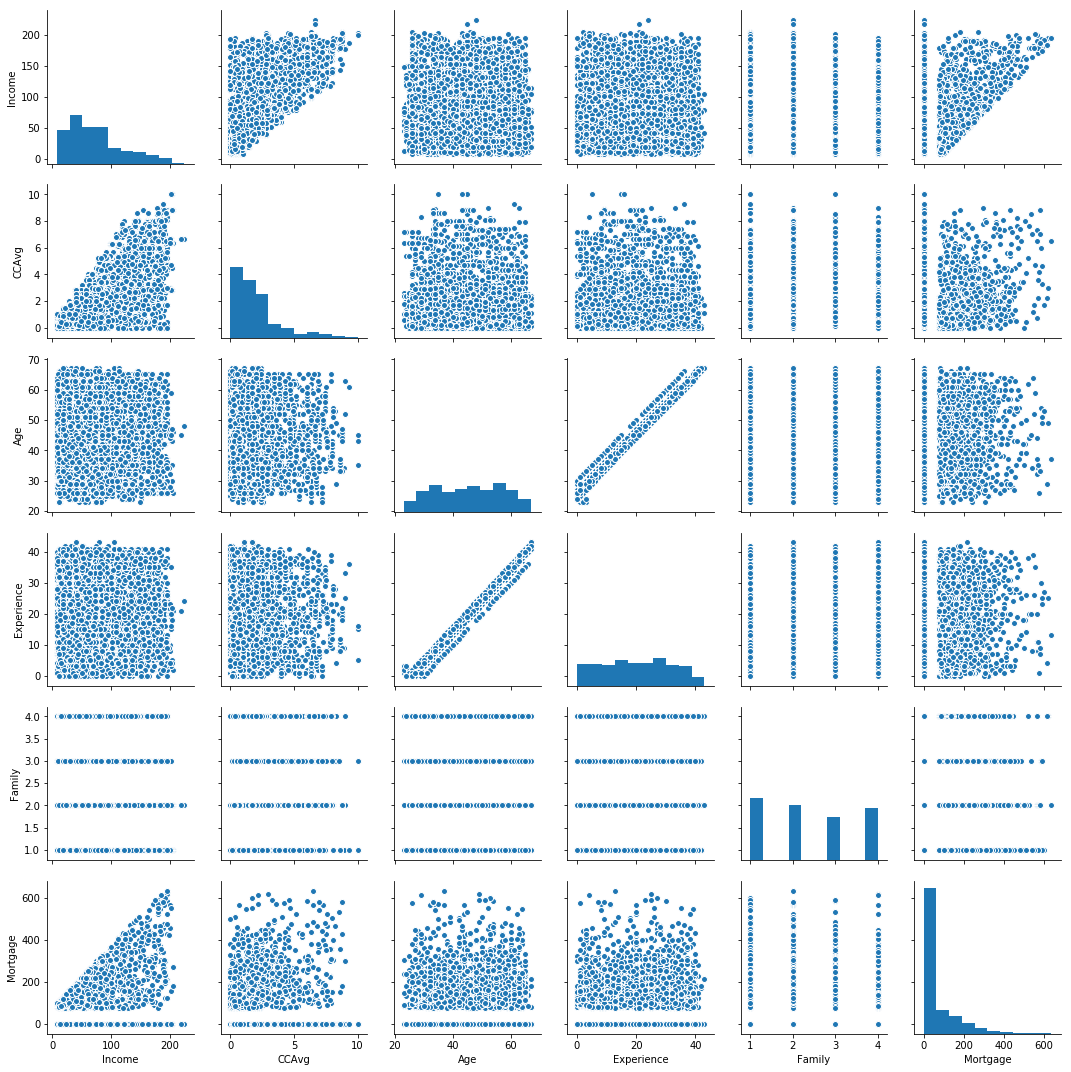

In [22]:
sns.pairplot(df[['Income','CCAvg','Age','Experience','Family','Mortgage']])

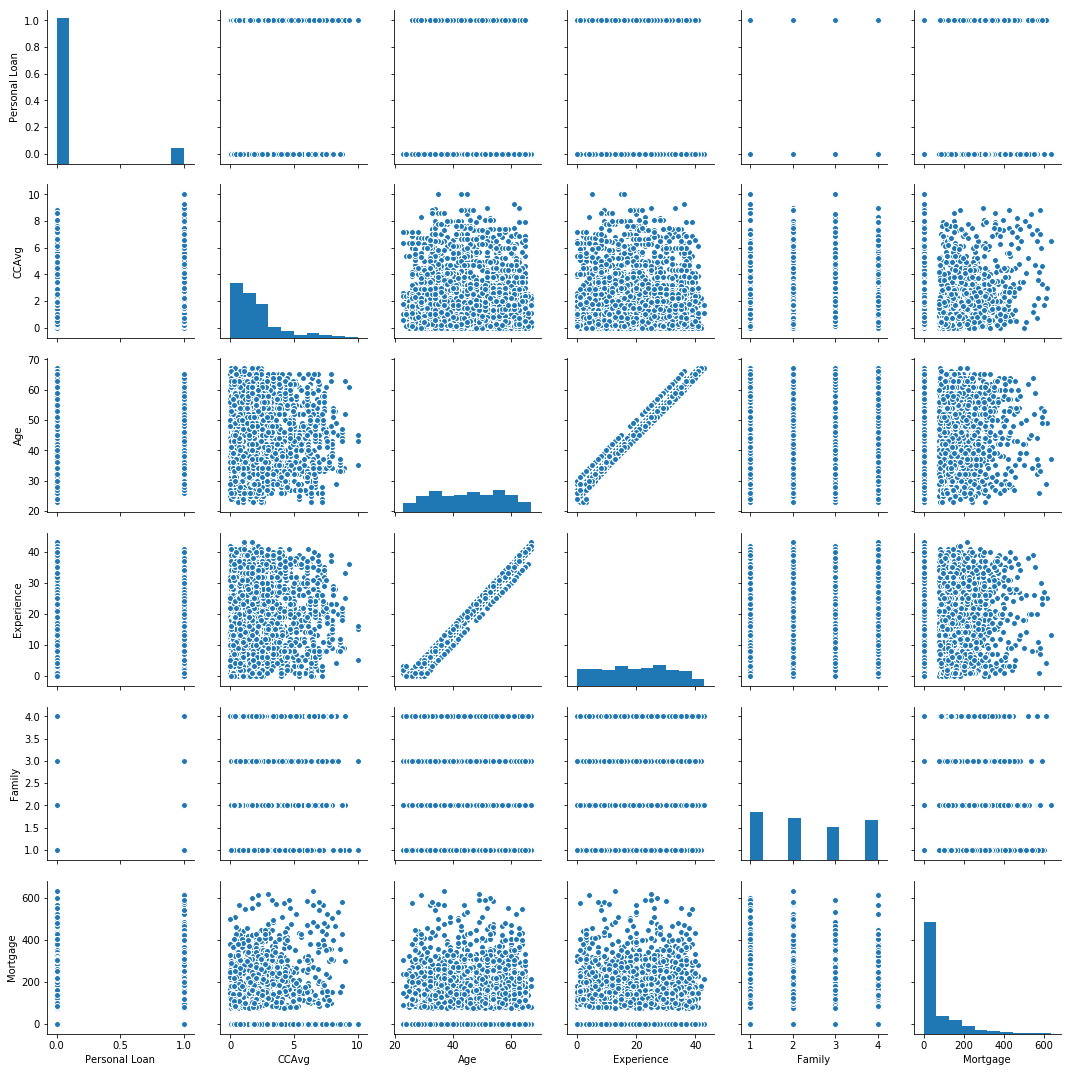

In [23]:
sns.pairplot(df[['Personal Loan','CCAvg','Age','Experience','Family','Mortgage']])

In [24]:
# 2.6 Get data model ready
# Dropping ID column and Zip Code Column
df.drop('ID',axis=1,inplace=True)
df.drop('ZIP Code',axis=1,inplace=True)
df.head()
# Converting X & Y variable to a categorical variable as relevant 
#       -Family,Education,Personal Loan,Securities Account,CD Account,Online,CreditCard
df['Family']=df['Family'].astype('category')
df['Education']=df['Education'].astype('category')
df['Personal Loan']=df['Personal Loan'].astype('category')
df['Securities Account']=df['Securities Account'].astype('category')
df['CD Account']=df['CD Account'].astype('category')
df['Online']=df['Online'].astype('category')
df['CreditCard']=df['CreditCard'].astype('category')

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,4,1.6,1,0,0,1,0,0,0
1,45,19,34,3,1.5,1,0,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,0,1


In [25]:
df.corr()
# Age and Experience are highly correlated. Hence dropping Experience Column
# Income and CCAvg are highly correlated. Hence dropping CCAvg Column
df.drop('Age', axis=1,inplace=True)
df.drop('CCAvg', axis=1,inplace=True)

,Age,Experience,Income,CCAvg,Mortgage
Age,1.000000,0.993991,-0.055269,-0.052012,-0.012539
Experience,0.993991,1.000000,-0.046876,-0.049738,-0.011097
Income,-0.055269,-0.046876,1.000000,0.645984,0.206806
CCAvg,-0.052012,-0.049738,0.645984,1.000000,0.109905
Mortgage,-0.012539,-0.011097,0.206806,0.109905,1.000000


In [26]:
#look at the target column which is 'Personal Loan' to understand how the data is distributed amongst the various values
df.groupby(["Personal Loan"]).mean()
df.info()

,Experience,Income,Mortgage
Personal Loan,,,
0,20.165487,66.237389,51.789381
1,19.843750,144.745833,100.845833


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
Experience            5000 non-null int64
Income                5000 non-null int64
Family                5000 non-null category
Education             5000 non-null category
Mortgage              5000 non-null int64
Personal Loan         5000 non-null category
Securities Account    5000 non-null category
CD Account            5000 non-null category
Online                5000 non-null category
CreditCard            5000 non-null category
dtypes: category(7), int64(3)
memory usage: 152.2 KB


In [27]:
# Baseline proportion - ratio of Yes to No to identify data imbalance: Observation: The Data is quite imbalanced
prop_Y = df['Personal Loan'].value_counts(normalize=True)
prop_Y

0    0.904
1    0.096
Name: Personal Loan, dtype: float64

In [ ]:
# Part of Question 2- Findings from EDA Analysis

# Insight 1: High Data Imbalance: 9.6% customers opted for personal loan (Refer In [27])

# Insight 2: 
     # Education: Higher % of customers with Education level - Graduate. (Refer Out [15])
     # Income & Mortgage: Mean values significantly higher for customers who opted for personal loans (Refer Out[26])
     # Educated - Higher no. of Professionals opted for personal loan as compared to graduates (Refer Out[19])
     # Age- 75% of the cutomers are aged more than 35. 50% of cutomers age lies between 35 and 55.
            
                      
# Insight 3: Age and Experience is highly correlated. Similarly CCAvg and Income are positively correlated (Refer Out[25])

# Insight 4: 3462 customers mortgage value is equal to 0

# Insight 5: 106 customers have zero credit card spend

# Insight 6: Low represntation of customers who have Securities account. Uniform representation of customers with different family size
            #(Refer Out[25]). 

In [28]:
# Define X and Y variables

X = df.drop('Personal Loan', axis=1)
Y = df[['Personal Loan']]

#Convert categorical vriables to dummy variables

X = pd.get_dummies(X, drop_first=True)
X.head()
Y.head()

,Experience,Income,Mortgage,Family_2,Family_3,Family_4,Education_2,Education_3,Securities Account_1,CD Account_1,Online_1,CreditCard_1
0,1,49,0,0,0,1,0,0,1,0,0,0
1,19,34,0,0,1,0,0,0,1,0,0,0
2,15,11,0,0,0,0,0,0,0,0,0,0
3,9,100,0,0,0,0,1,0,0,0,0,0
4,8,45,0,0,0,1,1,0,0,0,0,1


,Personal Loan
0,0
1,0
2,0
3,0
4,0


In [29]:
# 3. Split the data into training and test set in the ratio of 70:30 respectively (5 Marks)

# Libraries already imported

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30,random_state=1)

In [30]:
# 4.1. Use logistic Regression model to predict the number of a customers buying personal loans. (15 Marks)
# 4.2. Print all the metrics related for evaluating the model performance 

In [31]:
#Build the logistic Regression model

import statsmodels.api as sm

logit = sm.Logit(y_train, sm.add_constant(X_train))
lg = logit.fit()
lg.summary2()

Optimization terminated successfully.
         Current function value: 0.110197
         Iterations 9


<class 'statsmodels.iolib.summary2.Summary'>
"""
                             Results: Logit
========================================================================
Model:                Logit              Pseudo R-squared:   0.648      
Dependent Variable:   Personal Loan      AIC:                797.3798   
Date:                 2020-07-08 15:41   BIC:                877.4665   
No. Observations:     3500               Log-Likelihood:     -385.69    
Df Model:             12                 LL-Null:            -1095.5    
Df Residuals:         3487               LLR p-value:        8.5104e-297
Converged:            1.0000             Scale:              1.0000     
No. Iterations:       9.0000                                            
------------------------------------------------------------------------
                      Coef.   Std.Err.    z     P>|z|   [0.025   0.975] 
------------------------------------------------------------------------
const                -13.1110   0.7276 -18.0191 0.0000 -14.5371 -11.6849
Experience             0.0013   0.0084   0.1596 0.8732  -0.0151   0.0177
Income                 0.0679   0.0037  18.3656 0.0000   0.0607   0.0751
Mortgage               0.0006   0.0007   0.7677 0.4427  -0.0009   0.0020
Family_2               0.1307   0.2855   0.4579 0.6470  -0.4288   0.6903
Family_3               2.4609   0.3104   7.9292 0.0000   1.8526   3.0692
Family_4               1.6589   0.3073   5.3981 0.0000   1.0566   2.2613
Education_2            3.8223   0.3331  11.4749 0.0000   3.1694   4.4752
Education_3            4.0841   0.3314  12.3240 0.0000   3.4346   4.7336
Securities Account_1  -1.0140   0.3994  -2.5387 0.0111  -1.7969  -0.2312
CD Account_1           3.7712   0.4311   8.7481 0.0000   2.9263   4.6162
Online_1              -0.5356   0.2026  -2.6440 0.0082  -0.9327  -0.1386
CreditCard_1          -0.9879   0.2636  -3.7470 0.0002  -1.5046  -0.4711
========================================================================

"""

In [32]:
#Summary of logistic regression
#Library already imported

stats.chisqprob = lambda chisq, df: stats.chi2.sf(chisq, df)
print(lg.summary())

                           Logit Regression Results                           
Dep. Variable:          Personal Loan   No. Observations:                 3500
Model:                          Logit   Df Residuals:                     3487
Method:                           MLE   Df Model:                           12
Date:                Wed, 08 Jul 2020   Pseudo R-squ.:                  0.6479
Time:                        15:41:19   Log-Likelihood:                -385.69
converged:                       True   LL-Null:                       -1095.5
                                        LLR p-value:                8.510e-297
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  -13.1110      0.728    -18.019      0.000     -14.537     -11.685
Experience               0.0013      0.008      0.160      0.873      -0.015       0.018
Income      

In [33]:
# Odds Ratio, probability
# create a data frame to collate Odds ratio, probability and p-value of the coef
lgcoef = pd.DataFrame(lg.params, columns=['coef'])
lgcoef.loc[:, "Odds_ratio"] = np.exp(lgcoef.coef)
lgcoef['probability'] = lgcoef['Odds_ratio']/(1+lgcoef['Odds_ratio'])
lgcoef['pval']=lg.pvalues
pd.options.display.float_format = '{:.2f}'.format

In [34]:
# FIlter by significant p-value (pval <0.1) and sort descending by Odds ratio
lgcoef = lgcoef.sort_values(by="Odds_ratio", ascending=False)
pval_filter = lgcoef['pval']<=0.1
lgcoef[pval_filter]

,coef,Odds_ratio,probability,pval
Education_3,4.08,59.39,0.98,0.00
Education_2,3.82,45.71,0.98,0.00
CD Account_1,3.77,43.43,0.98,0.00
Family_3,2.46,11.71,0.92,0.00
Family_4,1.66,5.25,0.84,0.00
Income,0.07,1.07,0.52,0.00
Online_1,-0.54,0.59,0.37,0.01
CreditCard_1,-0.99,0.37,0.27,0.00
Securities Account_1,-1.01,0.36,0.27,0.01
const,-13.11,0.00,0.00,0.00


In [35]:
y_pred_df = pd.DataFrame()

y_pred_df['actual'] = y_test.values[:,0]

y_pred_df["predicted_prob"] = lg.predict( sm.add_constant( X_test ).values )
## Used statsmodel logit function to predict probaility of output being from class '1'

y_pred_df['predicted'] = y_pred_df.predicted_prob.map( lambda x: 1 if x > 0.6 else 0)
# Converted values which are above 0.6 as '1' and rest as '0'.
## Therefore thershold here is 0.7 as values at and above 0.7 probability is converted to '1'

y_pred_df[0:5] # data frame representing personal loan-actual value, predicted probability and predicted value at 0.7 threshold 
Count_Prob_actual=len(y_pred_df.loc[y_pred_df['actual']==1]) # no. of people actually opted for personal loan in the test data
Count_Prob_predicted=len(y_pred_df.loc[y_pred_df['predicted']==1])# no. of people predicted by test model 
Count_Prob_actual, Count_Prob_predicted

,actual,predicted_prob,predicted
0,0,0.01,0
1,0,0.00,0
2,0,0.00,0
3,0,0.00,0
4,0,0.08,0


(149, 89)

In [36]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score,roc_auc_score,cohen_kappa_score
confusion_matrix(y_pred_df['actual'], y_pred_df['predicted'])
print("Accuracy Score" , accuracy_score(y_pred_df['actual'], y_pred_df['predicted']))
print("Recall Score" , recall_score(y_pred_df['actual'], y_pred_df['predicted']))
print("Precision Score" , precision_score(y_pred_df['actual'], y_pred_df['predicted']))
print("ROC AUC Score" , roc_auc_score(y_pred_df['actual'], y_pred_df['predicted_prob']))

# Insights from Confusion Matrix

# 89 people will opt for the personal loan
# 1347 - True Positive
# 64   - False Positive
# 4    - False Negative
# 85   - True Negative
# Accuracy and precision score is good , model recall needs to be improved
# ROC AUC score shows model is performing well across the thresholds

array([[1347,    4],
       [  64,   85]], dtype=int64)

Accuracy Score 0.9546666666666667
Recall Score 0.5704697986577181
Precision Score 0.9550561797752809
ROC AUC Score 0.9539540683262212


In [37]:
# 5. Give your reasoning on how can the model perform better? (Hint: Check Parameter) (10 Marks)

# reasoning 1-   Hyperparameter tuning and regularization can be done to improve the predictions

# reasoning 2-   The data is imbalanced (9.6% opted for Personal Loan- Refer out[23]), 
              #  Oversampling of minority class can be done using SMOTE for better performance
              #  synthetic minority over sampling technique should be used to train the model. make more samples to train the data set

# reasoning 3-   For the columns that are continuous Age, Income, Mortgage we can try bucketing converting them to categorical
              #  or normalizing them so that all variables are in the same scale   

# reasoning 4- we can check the results by varying the solver default values and selecting the solver which gives better results
             # some of the outcomes are shown below where we have changed the solver default values and also looked at diff solvers
             # The selected solvers reflects quite similar results 

In [38]:
# Running a loop to check different values of 'solver' rather than the default solver values
train_score=[]
test_score=[]
solver = ['newton-cg','lbfgs','liblinear','sag','saga']
for i in solver:
    model = LogisticRegression(random_state=42,penalty='l2', C = 0.75,solver=i)  # changing values of solver
    model.fit(X_train, y_train) 
    y_predict = model.predict(X_test)     
    train_score.append(round(model.score(X_train, y_train),3))
    test_score.append(round(model.score(X_test, y_test),3))
    
print(solver)
print()
print(train_score)
print()
print(test_score)

C:\Program Files\Anaconda\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=0.75, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=42, solver='newton-cg', tol=0.0001,
          verbose=0, warm_start=False)

C:\Program Files\Anaconda\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=0.75, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=42, solver='lbfgs', tol=0.0001,
          verbose=0, warm_start=False)

C:\Program Files\Anaconda\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=0.75, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=42, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

C:\Program Files\Anaconda\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Program Files\Anaconda\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


LogisticRegression(C=0.75, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=42, solver='sag', tol=0.0001,
          verbose=0, warm_start=False)

C:\Program Files\Anaconda\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Program Files\Anaconda\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


LogisticRegression(C=0.75, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=42, solver='saga', tol=0.0001,
          verbose=0, warm_start=False)

['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']

[0.961, 0.961, 0.96, 0.9, 0.897]

[0.954, 0.955, 0.951, 0.889, 0.883]


In [39]:
train_score=[]
test_score=[]
solver = ['liblinear','saga']   # changing values of solver which works with 'l1'
for i in solver:
    model = LogisticRegression(random_state=42,penalty='l1', C = 0.75,solver=i)  #changed penalty to 'l1'
    model.fit(X_train, y_train) 
    y_predict = model.predict(X_test)     
    train_score.append(round(model.score(X_train, y_train),3))
    test_score.append(round(model.score(X_test, y_test),3))
    
print(solver)
print()
print(train_score)
print()
print(test_score)

C:\Program Files\Anaconda\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=0.75, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=42, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

C:\Program Files\Anaconda\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Program Files\Anaconda\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


LogisticRegression(C=0.75, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=42, solver='saga', tol=0.0001,
          verbose=0, warm_start=False)

['liblinear', 'saga']

[0.961, 0.899]

[0.956, 0.884]


In [40]:
# 6. Give Business undertstanding of your model? (5 Marks)

# inference 1-   All the variables like Income,Family,Education,CD Account,CreditCard have p values nearly 0 
# inference 1.1- This means they are significant in determining the output variable (personal loan)
# inference 1.2- EDA analysis also reflects the importance of these variables  

# inference 2-   A pseudo R^2 of 64.79% indicates that 64.79 % of the uncertainty of the intercept only model 
                 #is explained by the full model
    
# inference 3-   Y_Predict: potential people (count =89) who can go for personal loan at threshold value of 0.7

# inference 4-   Confusion Matrix-Accuracy and precision score is good , model recall needs to be improved

# inference 5-   According to ROC it shows model is performing well across the thresholds

# inference 6-   The table below selects the training data which has predicted probability greater than 0.7. 
                # This data can we used to target the right sets of liabilities customers for offering personal level              


In [41]:
X_test.head() # Test Data
X_test['Predicted']=lg.predict( sm.add_constant( X_test ))
X_test.loc[X_test['Predicted']>0.7] # Provides a view of Test data and the resultant predicted probabilities for the test data
# above data set can be used to select the target groups for the personal loan campaign based on the columns with p values nearing 0


,Experience,Income,Mortgage,Family_2,Family_3,Family_4,Education_2,Education_3,Securities Account_1,CD Account_1,Online_1,CreditCard_1
2764,5,84,105,0,0,0,0,1,0,0,0,1
4767,9,45,101,0,1,0,0,0,1,0,0,0
3814,9,35,0,0,1,0,0,0,0,0,0,0
3499,23,114,286,0,0,0,0,0,0,0,1,0
2735,12,70,165,0,1,0,1,0,0,0,1,0


,Experience,Income,Mortgage,Family_2,Family_3,Family_4,Education_2,Education_3,Securities Account_1,CD Account_1,Online_1,CreditCard_1,Predicted
932,27,112,0,0,1,0,1,0,1,1,1,1,0.89
2721,33,173,0,1,0,0,0,1,0,0,1,0,0.91
4494,4,182,0,0,0,0,0,1,0,0,1,0,0.94
348,15,173,0,0,0,1,0,0,0,1,1,1,0.93
3347,41,78,0,0,1,0,0,1,0,1,1,1,0.74
1524,16,155,0,0,0,1,0,1,0,1,1,1,1.00
1273,35,130,437,0,1,0,0,1,0,1,1,1,0.99
1038,30,145,0,0,0,1,1,0,0,1,1,1,0.99
4883,13,129,0,0,1,0,0,1,0,1,1,1,0.99
1444,33,154,0,0,0,0,1,0,1,1,1,0,0.97
